<a href="https://colab.research.google.com/github/omajipawar/Appliances-Energy-Prediction/blob/main/Appliances_Energy_Prediction_(Omaji_Pawar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

The main objective is to build a predictive model, which could help them in predicting Appliance energy consumption for a house based on factors like temperature, humidity & pressure . In order to achieve this, we need to develop a supervised learning model using regression algorithms.

In [1]:
#Importing importnat python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_absolute_error, mean_squared_error,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
#Working directory path
file_path = '/content/drive/MyDrive/csv files/data_application_energy.csv'

In [4]:
#reading the dataset
df = pd.read_csv(file_path)

In [5]:
#Making copy of dataframe
df2 = df.copy()

## **Data Exploration**

In [6]:
#Observing first five rows of the dataset
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
#Observing last five rows of the dataset
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


**Understanding** **features**

There are 29 features to describe appliances energy use :
1. date : time year-month-day hour:minute:second
2. lights : energy use of light fixtures in the house in Wh
3. T1 : Temperature in kitchen area, in Celsius
4. T2 : Temperature in living room area, in Celsius
5. T3 : Temperature in laundry room area
6. T4 : Temperature in office room, in Celsius
7. T5 : Temperature in bathroom, in Celsius
8. T6 : Temperature outside the building (north side), in Celsius
9. T7 : Temperature in ironing room, in Celsius
10.T8 : Temperature in teenager room 2, in Celsius
11. T9 : Temperature in parents’ room, in Celsius
12. T_out : Temperature outside (from Chievres weather station), in Celsius
13. Tdewpoint : (from Chievres weather station), Â°C
14. RH_1 : Humidity in kitchen area, in %
15. RH_2 : Humidity in living room area, in %
16. RH_3 : Humidity in laundry room area, in %
17. RH_4 : Humidity in office room, in %
18. RH_5 : Humidity in bathroom, in %
19. RH_6 : Humidity outside the building (north side), in %
20. RH_7 : Humidity in ironing room, in %
21. RH_8 : Humidity in teenager room 2, in %
22. RH_9 : Humidity in parents’ room, in %
23. RH_out :Humidity outside (from Chievres weather station), in %
24. Pressure : (from Chievres weather station), in mm Hg
25. Wind speed: (from Chievres weather station), in m/s
26. Visibility :(from Chievres weather station), in km
27. Rv1 :Random variable 1, non-dimensional
28. Rv2 :Random variable 2, non-dimensional
29. Appliances : Total energy used by appliances, in Wh

In [8]:
#basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [9]:
#Shape of dataset
df.shape

(19735, 29)

There are total 19735 rows and 29 columns in the dataset.

In [10]:
#Descriptive summary of data
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## **Looking for and handling NaN values**

In [11]:
#Check for null values in each column
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

There is no null values present in entire dataset.

In [12]:
#Dropping duplicates rows
df.drop_duplicates()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [13]:
#Shape after removing duplicates
df.shape

(19735, 29)

The shape of dataset is not changed, So there is no duplicate values are present in the dataset.

### **Outliers**



*   Detecting otliers using boxplot.
*   An outlier is an observation that is numerically distant from the rest of the data. When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.



In [14]:
#List of Variables of dataframe
print(df.columns.tolist())

['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [15]:
#Creating a list of numeric features 
numeric_features = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

In [16]:
#Creating a zipped list of numbers and features
numbers = list(range(1,29))
zipped = list(zip(numbers,numeric_features))

In [17]:
print(zipped)

[(1, 'Appliances'), (2, 'lights'), (3, 'T1'), (4, 'RH_1'), (5, 'T2'), (6, 'RH_2'), (7, 'T3'), (8, 'RH_3'), (9, 'T4'), (10, 'RH_4'), (11, 'T5'), (12, 'RH_5'), (13, 'T6'), (14, 'RH_6'), (15, 'T7'), (16, 'RH_7'), (17, 'T8'), (18, 'RH_8'), (19, 'T9'), (20, 'RH_9'), (21, 'T_out'), (22, 'Press_mm_hg'), (23, 'RH_out'), (24, 'Windspeed'), (25, 'Visibility'), (26, 'Tdewpoint'), (27, 'rv1'), (28, 'rv2')]


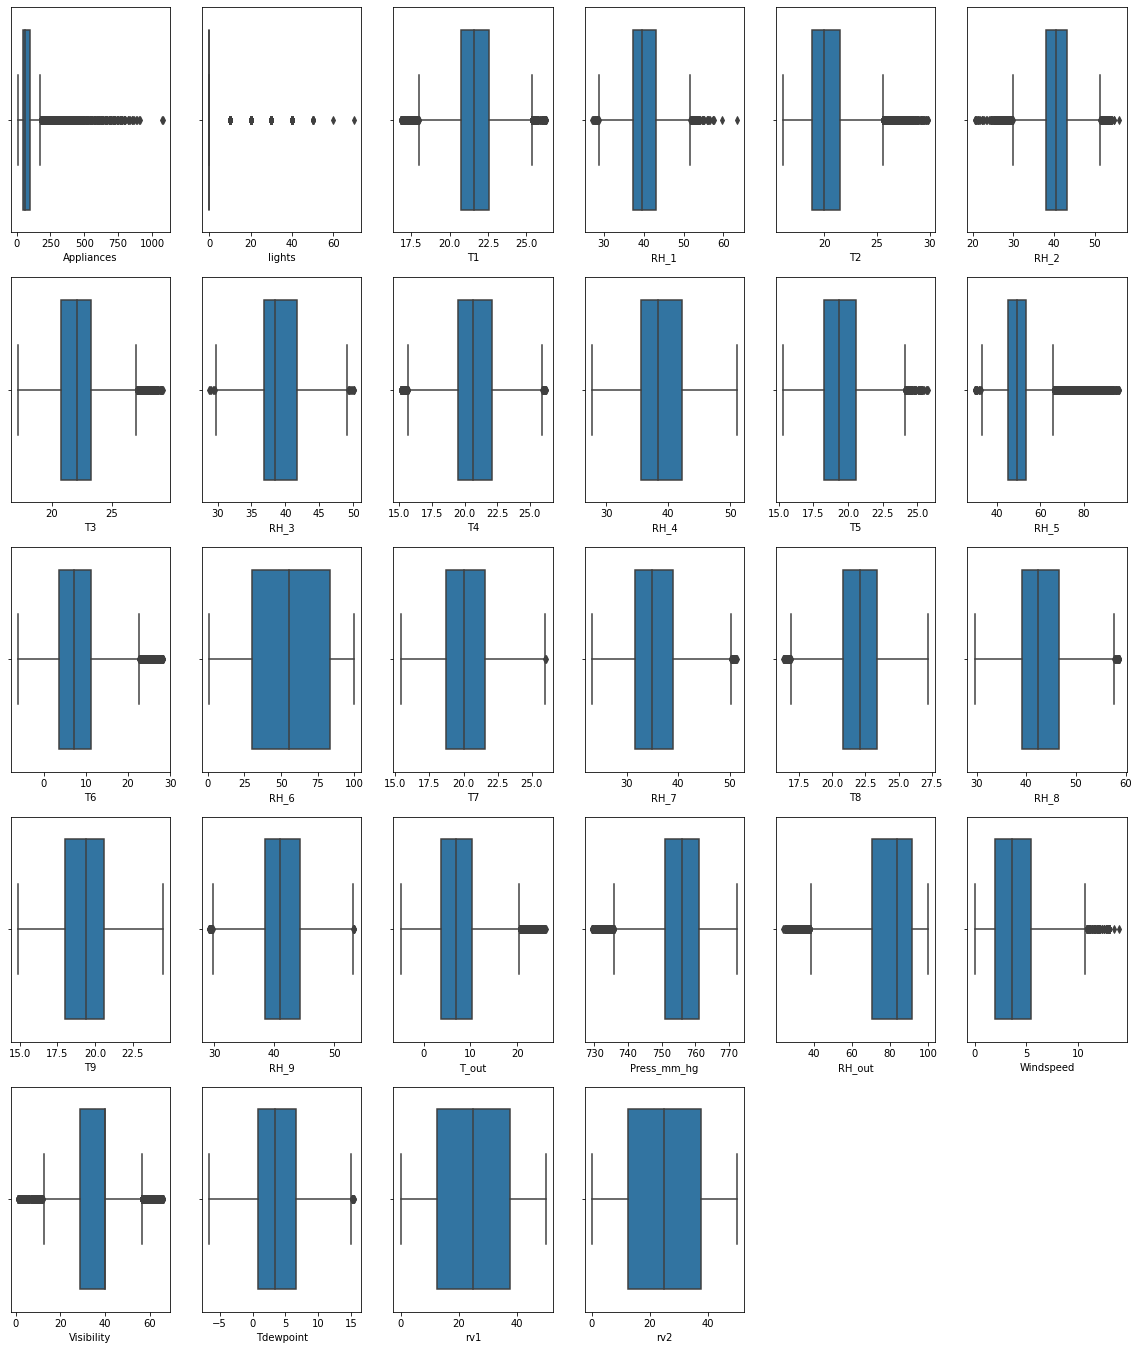

In [18]:
#Plotting boxplot of each variable to detect outliers
plt.figure(figsize=(20, 24))
for x,y in zipped:
  plt.subplot(5,6,x), sns.boxplot(df[y])

Removing outliers by using **IQR method**


In [19]:
#Removing the outliers 

Q1=df.quantile(0.25)        #lower quartile
Q3 = df.quantile(0.75)      #upper quartile
IQR = Q3-Q1                 #Inter quartile range

#Get the dataframe 
df = df[~((df < (Q1-IQR * 1.5)) |(df > (Q3 + IQR*1.5)))]

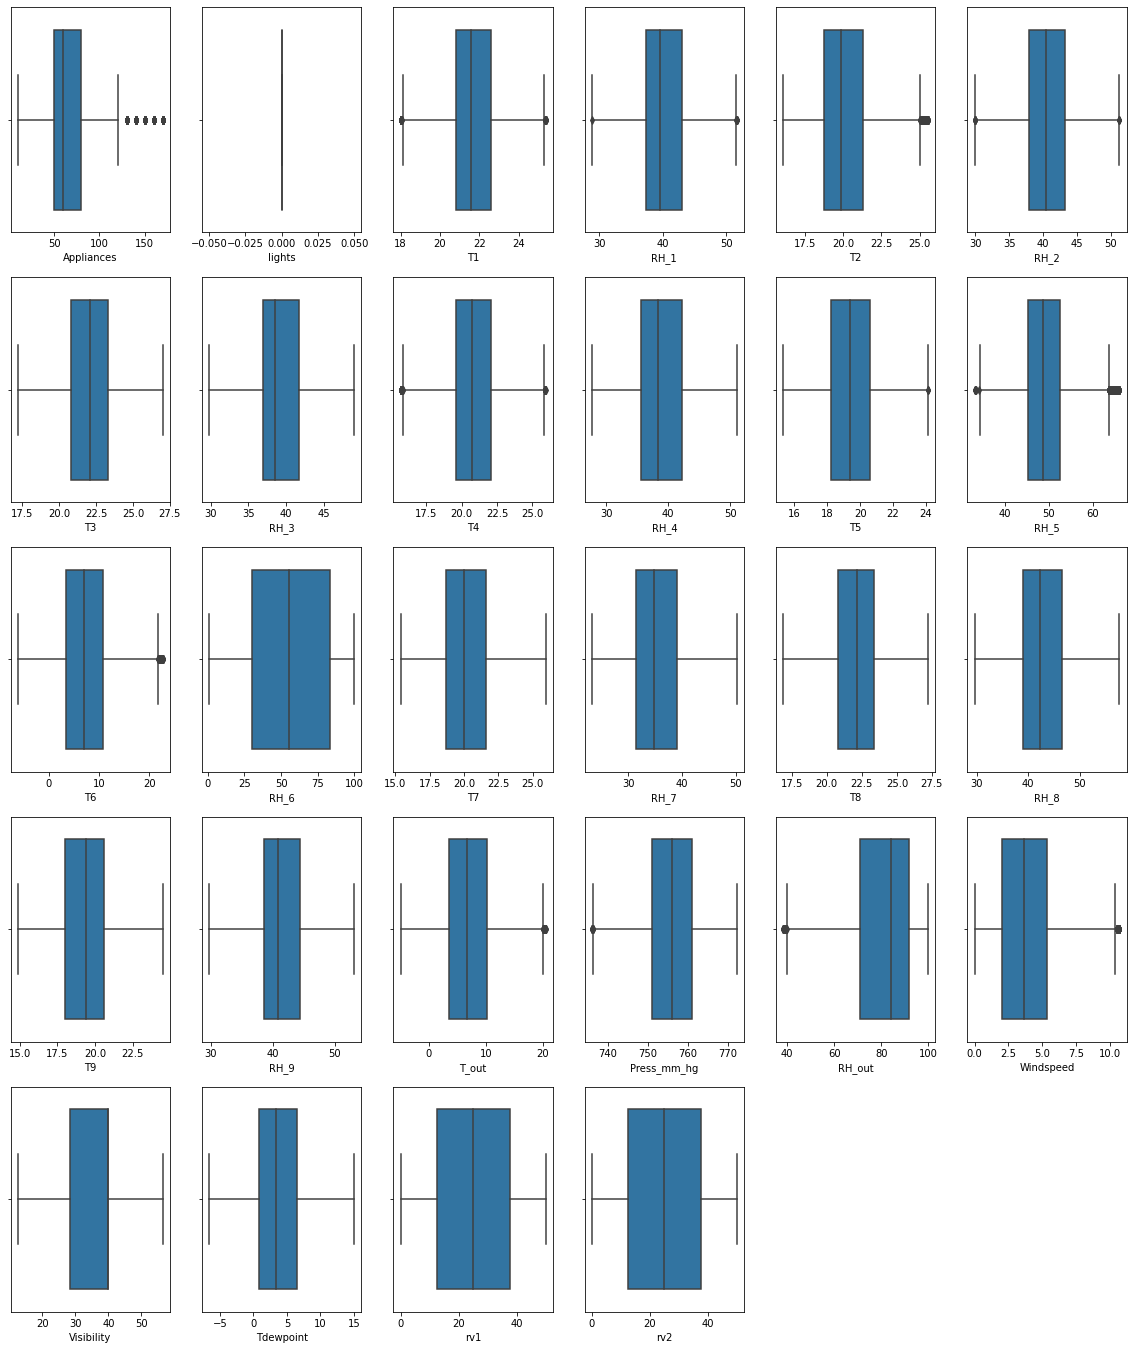

In [20]:
#Plotting boxplot after removing the outliers
plt.figure(figsize=(20, 24))
for x,y in zipped:
  plt.subplot(5,6,x), sns.boxplot(df[y])

When we remove the outliers from the dataframe, outliers are replaced by NaN values.

In [21]:
#Dropping NaN values
df.dropna(inplace=True)

## **EDA and Visualization**

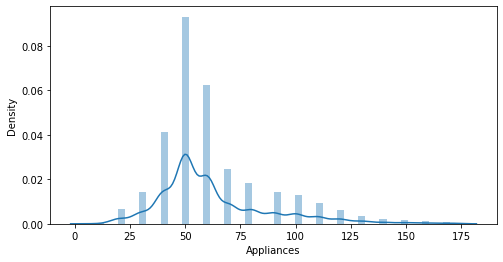

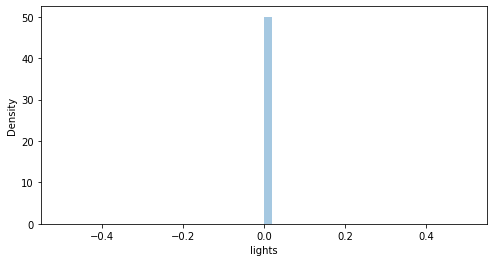

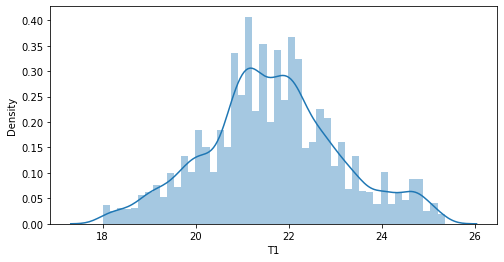

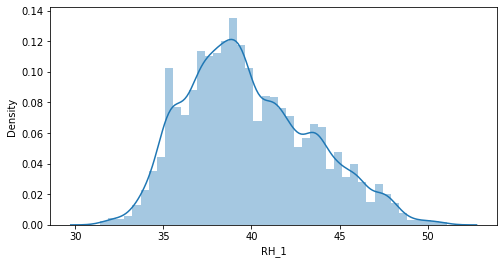

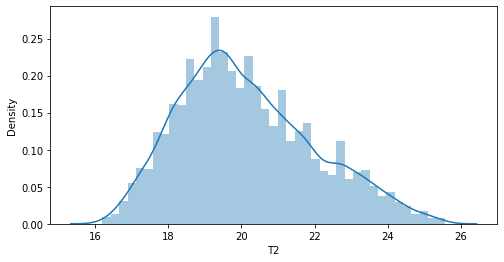

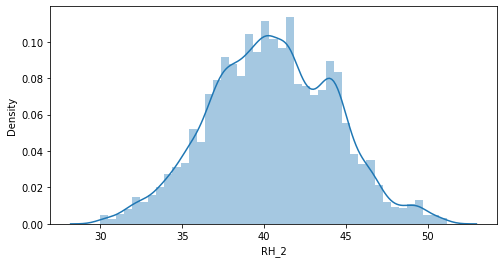

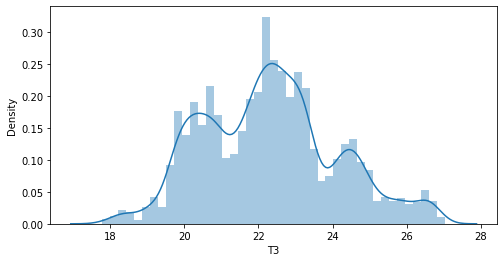

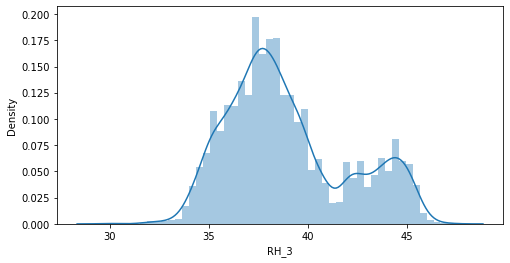

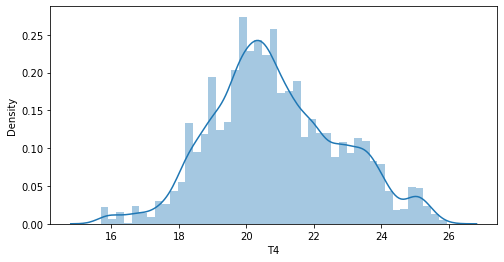

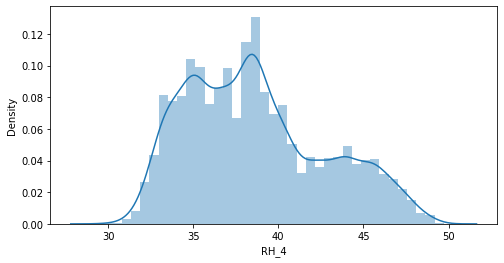

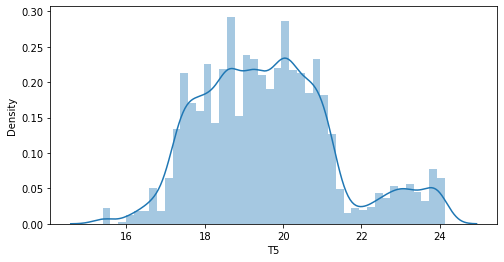

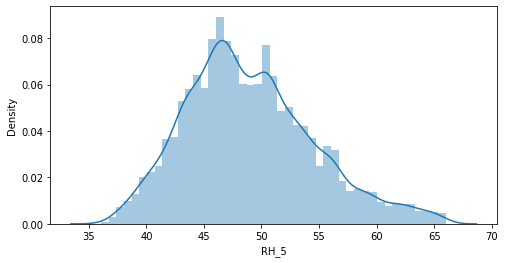

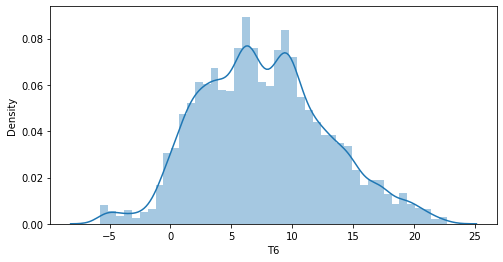

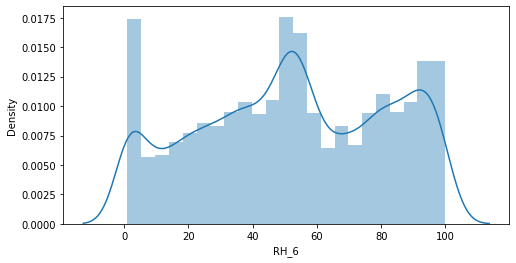

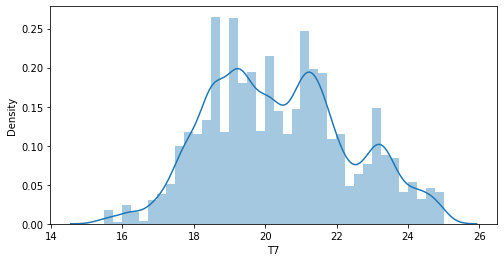

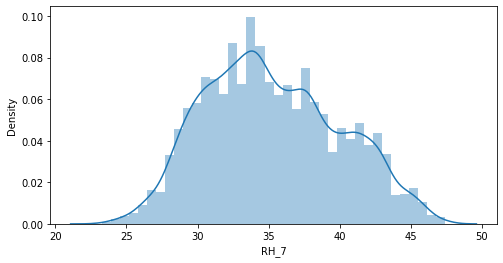

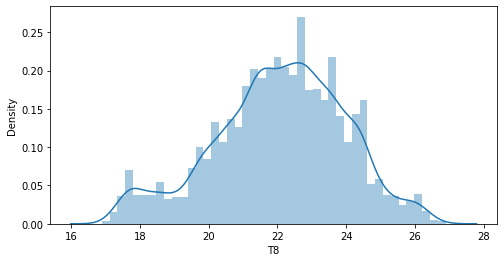

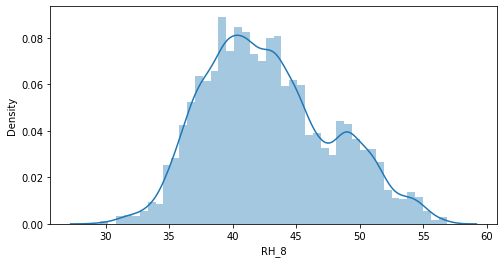

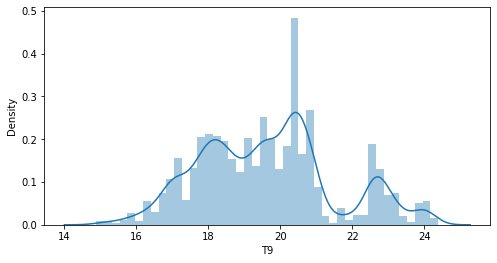

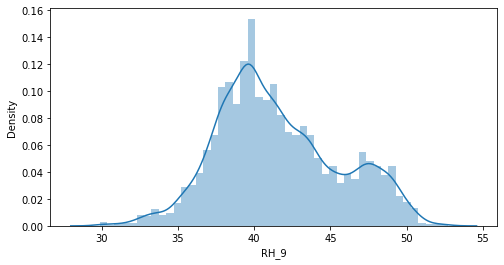

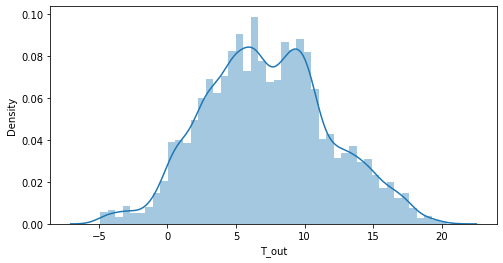

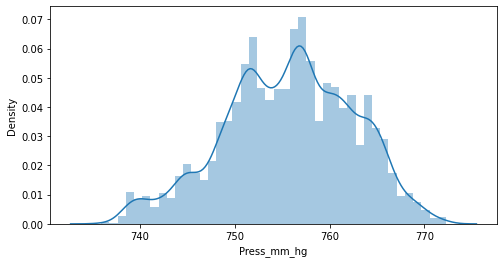

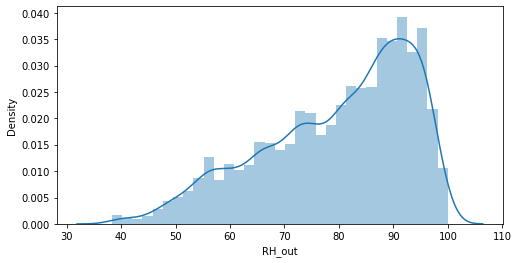

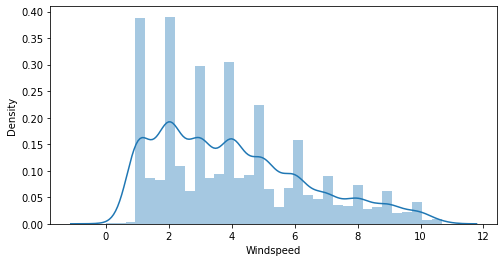

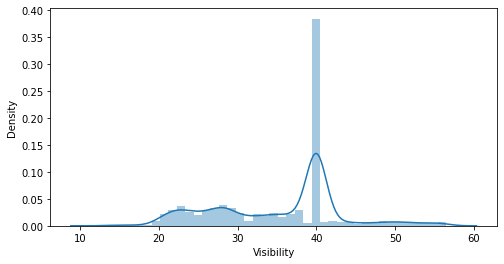

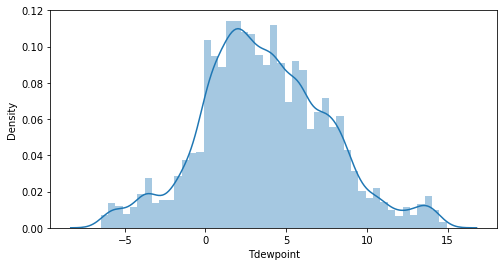

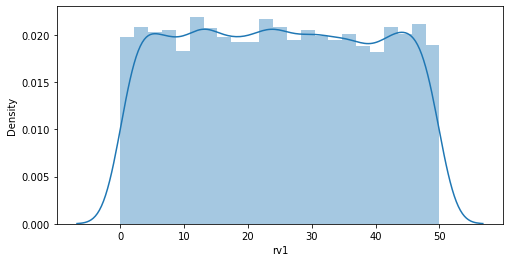

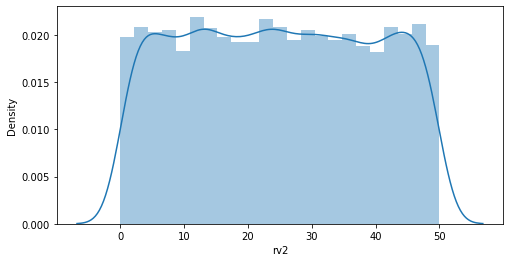

In [22]:
#Plotting distribution plots of all the variables of dataframe
for col in numeric_features:
    fig = plt.figure(figsize=(8, 4))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(df[col],hist=True)

**Observations:**

*   Almost all Temperature variable follows "Normal Distribution" except T9.
*   Almost all Humidity variable follows "Normal Distribution" except RH_Out and RH_6, may be because they were placed outside the house.
*   Windspeed column is postively skewed & RH_out is negatively skewed.
*   RH_6 , RH_out , Visibility , Windspeed irregular distribution.

*   Appliances column is postively skewed with most of the values around mean 100 Wh.






## **Finding correlation in variables**

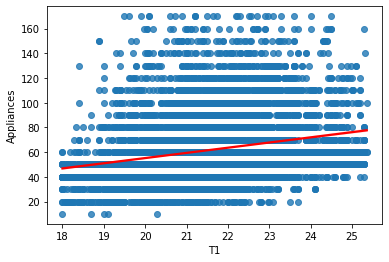

In [23]:
#Plotting regplot between T1 and Appliances
sns.regplot(x=df['T1'],y=df['Appliances'], line_kws={"color": "red"})

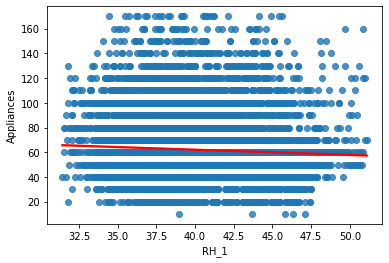

In [24]:
#Plotting regplot between RH_1 and Appliances
sns.regplot(x=df['RH_1'],y=df['Appliances'], line_kws={"color": "red"})

In [25]:
#Correlation matrix
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,NaN,0.241373,-0.059289,0.266768,-0.179833,0.188821,-0.205024,0.202812,-0.133719,0.184132,-0.159742,0.264075,-0.319049,0.204011,-0.219103,0.297525,-0.292586,0.194330,-0.266559,0.237510,-0.063881,-0.300404,0.054996,0.047829,0.059062,-0.012634,-0.012634
lights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T1,0.241373,NaN,1.000000,0.102905,0.794794,0.039557,0.891001,-0.094671,0.873608,0.025573,0.880007,-0.108820,0.572843,-0.582604,0.844076,0.074134,0.834422,-0.043149,0.858974,0.024635,0.609825,-0.102597,-0.182559,-0.176341,0.066333,0.554980,-0.003101,-0.003101
RH_1,-0.059289,NaN,0.102905,1.000000,0.253654,0.818989,0.196290,0.856394,0.065007,0.899572,0.163473,0.465804,0.333001,0.308610,-0.007531,0.804841,-0.098016,0.722994,0.093351,0.774168,0.374434,-0.281225,0.283569,0.181123,0.018096,0.626526,-0.009007,-0.009007
T2,0.266768,NaN,0.794794,0.253654,1.000000,-0.128568,0.659947,0.087574,0.722617,0.200614,0.655584,-0.049860,0.762136,-0.555189,0.616682,0.165108,0.531948,0.016416,0.639148,0.105452,0.746605,-0.082965,-0.416058,0.031363,0.079254,0.547518,-0.006014,-0.006014
RH_2,-0.179833,NaN,0.039557,0.818989,-0.128568,1.000000,0.207163,0.688402,-0.003718,0.740442,0.171283,0.412339,0.052148,0.403706,0.009178,0.719575,-0.019057,0.679128,0.117739,0.700526,0.122552,-0.266264,0.575195,0.018905,-0.028541,0.546878,-0.003880,-0.003880
T3,0.188821,NaN,0.891001,0.196290,0.659947,0.207163,1.000000,-0.075279,0.855027,0.055326,0.902995,-0.113846,0.579162,-0.582550,0.845933,0.121942,0.813174,0.014158,0.913820,0.084205,0.609721,-0.151906,-0.070474,-0.215763,0.049618,0.636509,-0.002092,-0.002092
RH_3,-0.205024,NaN,-0.094671,0.856394,0.087574,0.688402,-0.075279,1.000000,-0.195216,0.907236,-0.108843,0.564662,0.068633,0.563663,-0.267629,0.843339,-0.335578,0.827018,-0.216096,0.853175,0.128218,-0.227772,0.340417,0.241570,0.003607,0.384103,-0.010129,-0.010129
T4,0.202812,NaN,0.873608,0.065007,0.722617,-0.003718,0.855027,-0.195216,1.000000,-0.110520,0.887437,-0.183673,0.581660,-0.674755,0.886606,-0.005283,0.793678,-0.126865,0.899151,-0.074397,0.601598,-0.018638,-0.233800,-0.278433,0.037429,0.510467,0.001350,0.001350
RH_4,-0.133719,NaN,0.025573,0.899572,0.200614,0.740442,0.055326,0.907236,-0.110520,1.000000,0.016070,0.504616,0.257303,0.444071,-0.167166,0.871931,-0.227055,0.808703,-0.073500,0.850316,0.305803,-0.227309,0.327078,0.275842,0.003485,0.576597,-0.009004,-0.009004


Correlation heatmap is graphical representation of correlation matrix representing correlation between different variables.

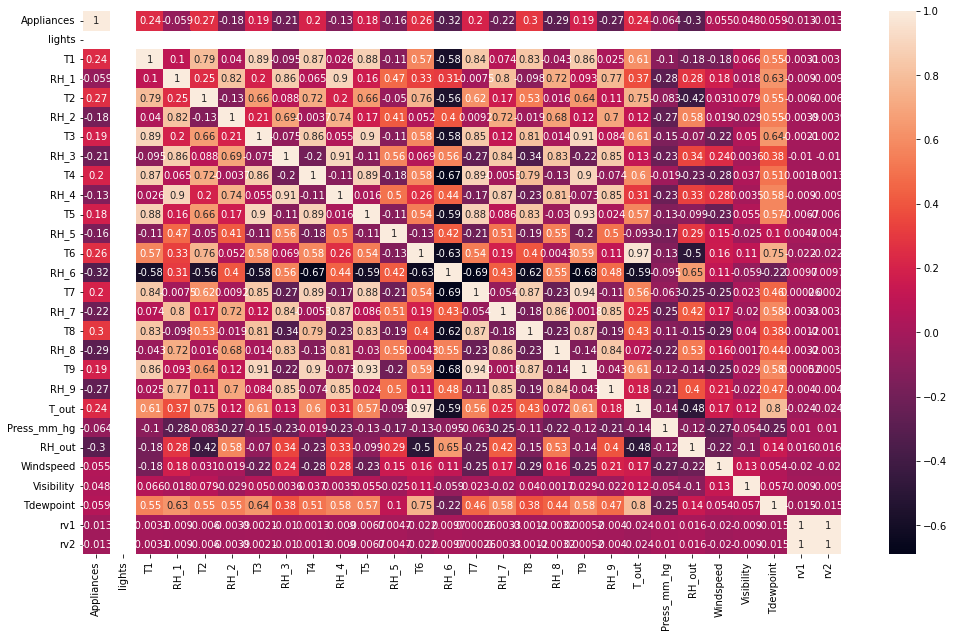

In [26]:
#Plotting heatmap
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)

**Observations:**

*   
Temperature — All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances.
*   Four columns have a high degree of correlation with T9 — T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside).
*   Weather attributes — Visibility, Tdewpoint, Press_mm_hg have low correlation values.
*   Humidity — There are no significantly high correlation cases (> 0.9) for humidity sensors.
*   The random variables rv1, rv2 and Visibility, Tdewpoint, Press_mm_hg have low correlation with the target variable.






## **Pick appropriate Independent Variables**

*   Four columns have a high degree of correlation with T9 — T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside).
*   Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.



In [27]:
#Dropping T6 and T9
df.drop(columns=['T6','T9'],axis=1,inplace=True)

Random variables have no role to play, So we can drop them.

In [28]:
#Dropping random variables
df.drop(columns=['rv1','rv2'],axis=1,inplace=True)

Visibility has no strong correlation with target variable so we can drop it.

In [29]:
#Dropping Visibility
df.drop('Visibility',axis=1,inplace=True)

We are not doing timeseries analysis so we can drop 'date' column.

In [30]:
#Dropping date column
df.drop('date',axis=1,inplace=True)

In [31]:
#value counts of light column
df['lights'].value_counts()

0.0    10485
Name: lights, dtype: int64

All the values of Light columns has zero values so we can drop it.

In [32]:
#Dropping 'lights' column
df.drop('lights',axis=1,inplace=True)

Windspeed is least important as the speed of wind doesn’t affect power consumption inside the house.

In [33]:
#Dropping 'Windspeed' column
df.drop('Windspeed',axis=1,inplace=True)

### **Train Test Split**

In [34]:
X = df.drop('Appliances',axis=1)   #Independent variables
y= df['Appliances']                #Target variables

**Feature scaling**

In [35]:
#Importing StandardScalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [36]:
#Applying feature scaling
X = scalar.fit_transform(X)
y = df['Appliances']

In [37]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)